# 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np

stock_df = pd.read_csv('https://raw.githubusercontent.com/RalfKellner/data_transfer/main/sp500_alltimers.csv')
three_factors = pd.read_csv('https://raw.githubusercontent.com/RalfKellner/dlta_repo/master/ff_factors_daily.csv')

In [2]:
stock_df

,date,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,...,WFC,WHR,WM,WMB,WMT,WRK,WY,XEL,XOM,YUM
0,1998-01-02,0.123676,8.664290,4.9977,10.592284,14.556592,8.9131,13.007511,16.675596,493.513336,...,9.802009,28.258766,22.608261,9.080934,12.959832,NaN,7.992623,9.964503,14.441016,3.740663
1,1998-01-05,0.120823,8.712471,5.0671,10.622808,14.753723,9.0913,12.912563,16.614594,490.152191,...,9.705754,28.684456,22.389481,9.239215,13.083271,NaN,8.105922,9.878420,14.280560,3.628285
2,1998-01-06,0.144131,8.567928,5.2368,10.378607,14.784045,9.3587,12.722677,16.573921,488.191773,...,9.609494,28.946413,22.644733,9.041370,13.165551,NaN,8.085321,9.738531,13.770018,3.475768
3,1998-01-07,0.133190,8.624138,5.1597,11.019638,14.586929,9.0457,12.608740,16.512913,483.429932,...,9.449069,28.193266,22.498867,8.843530,13.124411,NaN,7.817531,9.641684,14.207628,3.467741
4,1998-01-08,0.138423,8.736559,5.2060,10.958587,14.526262,9.2540,12.456830,16.553585,480.909332,...,9.609494,28.356985,21.878969,8.645684,12.939268,NaN,7.570335,9.663206,13.901303,3.331276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2022-11-23,151.070000,106.020000,335.7800,96.780000,262.580000,197.0700,88.139999,95.130000,60.960000,...,47.330000,148.350000,163.374374,33.830000,152.420000,37.62,31.973084,69.200000,113.610000,125.930000
6266,2022-11-25,148.110000,106.960000,334.3000,97.400000,263.950000,200.6600,88.809998,95.470000,61.080000,...,47.440000,148.770000,163.822647,33.900000,153.070000,37.51,32.132202,69.630000,113.210000,126.530000
6267,2022-11-28,144.220000,105.390000,328.9700,96.250000,258.330000,195.3500,87.940002,95.220000,60.740000,...,46.980000,143.820000,163.952133,33.480000,153.510000,36.22,31.038254,69.390000,109.810000,126.450000
6268,2022-11-29,141.170000,105.000000,326.7800,96.450000,257.060000,195.1800,87.239998,94.650000,61.440000,...,47.570000,145.980000,164.440231,34.320000,152.970000,36.72,31.585228,68.850000,110.540000,126.040000


In [3]:
stock_df.isna().sum().sort_values()

date       0
MRO        0
MS         0
MSFT       0
MSI        0
        ... 
SRE      122
MET      569
TPR      697
PARA    1993
WRK     4396
Length: 194, dtype: int64

In order to not drop to many rows I have decided that i just drop the companies with the missing values.

In [4]:
stock_df = stock_df.dropna(axis=1)
stock_df.index = pd.to_datetime(stock_df.date)
stock_df.drop(['date'], axis = 1, inplace = True)

<ipython-input-4-fd8a929963a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df.drop(['date'], axis = 1, inplace = True)


In [5]:
stock_df

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WBA,WFC,WHR,WM,WMB,WMT,WY,XEL,XOM,YUM
date,,,,,,,,,,,,,,,,,,,,,
1998-01-02,0.123676,8.664290,4.9977,10.592284,14.556592,8.9131,13.007511,16.675596,493.513336,25.293035,...,10.054314,9.802009,28.258766,22.608261,9.080934,12.959832,7.992623,9.964503,14.441016,3.740663
1998-01-05,0.120823,8.712471,5.0671,10.622808,14.753723,9.0913,12.912563,16.614594,490.152191,24.946089,...,10.074628,9.705754,28.684456,22.389481,9.239215,13.083271,8.105922,9.878420,14.280560,3.628285
1998-01-06,0.144131,8.567928,5.2368,10.378607,14.784045,9.3587,12.722677,16.573921,488.191773,24.685869,...,10.013694,9.609494,28.946413,22.644733,9.041370,13.165551,8.085321,9.738531,13.770018,3.475768
1998-01-07,0.133190,8.624138,5.1597,11.019638,14.586929,9.0457,12.608740,16.512913,483.429932,24.703232,...,9.993381,9.449069,28.193266,22.498867,8.843530,13.124411,7.817531,9.641684,14.207628,3.467741
1998-01-08,0.138423,8.736559,5.2060,10.958587,14.526262,9.2540,12.456830,16.553585,480.909332,24.460360,...,9.769954,9.609494,28.356985,21.878969,8.645684,12.939268,7.570335,9.663206,13.901303,3.331276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,151.070000,106.020000,335.7800,96.780000,262.580000,197.0700,88.139999,95.130000,60.960000,133.489563,...,41.760000,47.330000,148.350000,163.374374,33.830000,152.420000,31.973084,69.200000,113.610000,125.930000
2022-11-25,148.110000,106.960000,334.3000,97.400000,263.950000,200.6600,88.809998,95.470000,61.080000,134.552704,...,41.660000,47.440000,148.770000,163.822647,33.900000,153.070000,32.132202,69.630000,113.210000,126.530000
2022-11-28,144.220000,105.390000,328.9700,96.250000,258.330000,195.3500,87.940002,95.220000,60.740000,131.869995,...,40.810000,46.980000,143.820000,163.952133,33.480000,153.510000,31.038254,69.390000,109.810000,126.450000


In [6]:
three_factors

,date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.23,-0.28,0.009
1,19260702,0.45,-0.34,-0.03,0.009
2,19260706,0.17,0.29,-0.38,0.009
3,19260707,0.09,-0.59,0.00,0.009
4,19260708,0.21,-0.38,0.18,0.009
...,...,...,...,...,...
25267,20220624,3.11,-0.36,-0.05,0.003
25268,20220627,-0.28,0.54,1.24,0.003
25269,20220628,-2.10,-0.35,2.36,0.003
25270,20220629,-0.20,-0.44,-1.30,0.003


In [7]:
three_factors.loc[:, 'date'] = [str(d) for d in three_factors.date]
three_factors.set_index(pd.to_datetime([d[:4] + '-' + d[4:6] + '-' + d[6:] for d in three_factors.date]), inplace = True)
three_factors.drop(['date'], axis = 1, inplace = True)
three_factors = three_factors / 100       # necessary ?
three_factors

,Mkt-RF,SMB,HML,RF
1926-07-01,0.0010,-0.0023,-0.0028,0.00009
1926-07-02,0.0045,-0.0034,-0.0003,0.00009
1926-07-06,0.0017,0.0029,-0.0038,0.00009
1926-07-07,0.0009,-0.0059,0.0000,0.00009
1926-07-08,0.0021,-0.0038,0.0018,0.00009
...,...,...,...,...
2022-06-24,0.0311,-0.0036,-0.0005,0.00003
2022-06-27,-0.0028,0.0054,0.0124,0.00003
2022-06-28,-0.0210,-0.0035,0.0236,0.00003
2022-06-29,-0.0020,-0.0044,-0.0130,0.00003


In [8]:
dicrete_returns_df = stock_df.pct_change().dropna()
dicrete_returns_df

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WBA,WFC,WHR,WM,WMB,WMT,WY,XEL,XOM,YUM
date,,,,,,,,,,,,,,,,,,,,,
1998-01-05,-0.023076,0.005561,0.013886,0.002882,0.013542,0.019993,-0.007299,-0.003658,-0.006811,-0.013717,...,0.002020,-0.009820,0.015064,-0.009677,0.017430,0.009525,0.014175,-0.008639,-0.011111,-0.030042
1998-01-06,0.192914,-0.016590,0.033491,-0.022988,0.002055,0.029413,-0.014706,-0.002448,-0.004000,-0.010431,...,-0.006048,-0.009918,0.009132,0.011401,-0.021414,0.006289,-0.002541,-0.014161,-0.035751,-0.042036
1998-01-07,-0.075908,0.006560,-0.014723,0.061765,-0.013333,-0.033445,-0.008955,-0.003681,-0.009754,0.000703,...,-0.002029,-0.016694,-0.026019,-0.006442,-0.021882,-0.003125,-0.033121,-0.009945,0.031780,-0.002309
1998-01-08,0.039284,0.013036,0.008973,-0.005540,-0.004159,0.023028,-0.012048,0.002463,-0.005214,-0.009832,...,-0.022357,0.016978,0.005807,-0.027552,-0.022372,-0.014107,-0.031621,0.002232,-0.021561,-0.039353
1998-01-09,0.000000,-0.011029,-0.022224,-0.025070,-0.019833,-0.075567,0.009147,-0.006142,-0.038439,-0.041135,...,0.002078,-0.046744,-0.035797,-0.016667,-0.013730,-0.028617,-0.017687,-0.010023,-0.024134,0.002410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,0.005926,0.010966,0.014809,-0.009112,0.002329,-0.056630,0.010432,0.015153,0.001314,0.003586,...,-0.001912,0.003179,0.004401,0.004717,0.003560,-0.001964,-0.004952,0.002899,0.004891,0.012543
2022-11-25,-0.019594,0.008866,-0.004408,0.006406,0.005217,0.018217,0.007602,0.003574,0.001969,0.007964,...,-0.002395,0.002324,0.002831,0.002744,0.002069,0.004265,0.004977,0.006214,-0.003521,0.004765
2022-11-28,-0.026264,-0.014678,-0.015944,-0.011807,-0.021292,-0.026463,-0.009796,-0.002619,-0.005566,-0.019938,...,-0.020403,-0.009696,-0.033273,0.000790,-0.012389,0.002875,-0.034045,-0.003447,-0.030033,-0.000632


In [9]:
# Data for my respective timeline
discrete_df_19_22 = dicrete_returns_df.loc["2019-01-01":"2022-12-31"]
discrete_df_19_22

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WBA,WFC,WHR,WM,WMB,WMT,WY,XEL,XOM,YUM
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.001141,-0.039126,-0.007382,-0.000488,-0.007474,0.002721,-0.026062,-0.024084,0.005329,-0.011981,...,-0.004244,0.018663,0.009825,-0.003034,0.016780,0.002040,-0.015096,-0.021311,0.021997,-0.005222
2019-01-03,-0.099608,-0.047194,-0.039498,-0.004396,-0.030198,-0.055133,0.002518,-0.002331,-0.021959,-0.016414,...,-0.010435,-0.007882,-0.003336,-0.002705,0.008475,-0.005142,0.033906,-0.003940,-0.015354,-0.025153
2019-01-04,0.042690,0.028541,0.048632,0.023056,0.039854,0.052770,0.014131,0.009207,0.036903,0.029514,...,0.033269,0.029633,0.048903,0.026560,0.041574,0.006246,0.034142,0.009786,0.036870,0.026026
2019-01-07,-0.002226,0.014976,0.013573,0.005035,-0.005410,0.034612,-0.011457,-0.005583,0.005724,-0.001572,...,0.005750,-0.006465,0.029162,0.002422,0.025478,0.011772,0.019983,-0.004330,0.005200,-0.001094
2019-01-08,0.019063,-0.012006,0.014918,0.018607,0.005899,0.008665,0.015818,0.012324,0.003959,-0.000121,...,0.020008,-0.002099,0.022478,0.014168,0.029814,0.006981,0.005963,0.011597,0.007271,-0.001970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,0.005926,0.010966,0.014809,-0.009112,0.002329,-0.056630,0.010432,0.015153,0.001314,0.003586,...,-0.001912,0.003179,0.004401,0.004717,0.003560,-0.001964,-0.004952,0.002899,0.004891,0.012543
2022-11-25,-0.019594,0.008866,-0.004408,0.006406,0.005217,0.018217,0.007602,0.003574,0.001969,0.007964,...,-0.002395,0.002324,0.002831,0.002744,0.002069,0.004265,0.004977,0.006214,-0.003521,0.004765
2022-11-28,-0.026264,-0.014678,-0.015944,-0.011807,-0.021292,-0.026463,-0.009796,-0.002619,-0.005566,-0.019938,...,-0.020403,-0.009696,-0.033273,0.000790,-0.012389,0.002875,-0.034045,-0.003447,-0.030033,-0.000632


# 2. Risk Contribution


"Below, we will see that one possible way to identify individual risk contribution is given by the covariance matrix. The i-th row of the covariance matrix contains the variance of the i-th stock and all its pairwise covariances. Simply summing over each row gives us a number which is higher, the higher the stock's variance as well as pairwise covariances."

In [10]:
discrete_df_19_22.cov()

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WBA,WFC,WHR,WM,WMB,WMT,WY,XEL,XOM,YUM
AAPL,0.000476,0.000209,0.000362,0.000171,0.000242,0.000358,0.000152,0.000128,0.000244,0.000179,...,0.000176,0.000229,0.000290,0.000139,0.000184,0.000128,0.000308,0.000151,0.000167,0.000175
ABT,0.000209,0.000310,0.000225,0.000136,0.000194,0.000225,0.000154,0.000131,0.000170,0.000149,...,0.000148,0.000169,0.000222,0.000137,0.000112,0.000099,0.000228,0.000151,0.000101,0.000140
ADBE,0.000362,0.000225,0.000576,0.000145,0.000256,0.000458,0.000138,0.000114,0.000214,0.000151,...,0.000143,0.000200,0.000253,0.000139,0.000175,0.000131,0.000297,0.000142,0.000127,0.000158
ADM,0.000171,0.000136,0.000145,0.000338,0.000186,0.000187,0.000149,0.000129,0.000315,0.000197,...,0.000190,0.000279,0.000232,0.000144,0.000230,0.000089,0.000297,0.000137,0.000260,0.000151
ADP,0.000242,0.000194,0.000256,0.000186,0.000346,0.000279,0.000183,0.000159,0.000292,0.000219,...,0.000180,0.000269,0.000262,0.000177,0.000208,0.000105,0.000314,0.000174,0.000203,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WMT,0.000128,0.000099,0.000131,0.000089,0.000105,0.000115,0.000118,0.000094,0.000078,0.000089,...,0.000126,0.000101,0.000119,0.000090,0.000054,0.000219,0.000129,0.000107,0.000068,0.000060
WY,0.000308,0.000228,0.000297,0.000297,0.000314,0.000355,0.000232,0.000186,0.000468,0.000285,...,0.000259,0.000430,0.000478,0.000218,0.000351,0.000129,0.000703,0.000219,0.000334,0.000281
XEL,0.000151,0.000151,0.000142,0.000137,0.000174,0.000140,0.000243,0.000217,0.000169,0.000152,...,0.000118,0.000157,0.000183,0.000148,0.000108,0.000107,0.000219,0.000263,0.000107,0.000131
XOM,0.000167,0.000101,0.000127,0.000260,0.000203,0.000192,0.000135,0.000105,0.000387,0.000211,...,0.000198,0.000353,0.000234,0.000134,0.000373,0.000068,0.000334,0.000107,0.000526,0.000169


In [11]:
# sorted risk contribution of each company
risk_contribution = discrete_df_19_22.cov().sum(axis=0).sort_values(ascending = False)
risk_contribution

LNC    0.088944
APA    0.079944
HAL    0.074073
OXY    0.072218
FCX    0.068627
         ...   
NEM    0.015898
GIS    0.015151
CPB    0.013109
KR     0.011918
CLX    0.010546
Length: 188, dtype: float64

In [12]:
low_risk = risk_contribution.nsmallest(10).index.tolist()
low_risk

['CLX', 'KR', 'CPB', 'GIS', 'NEM', 'K', 'WMT', 'CAG', 'KMB', 'VZ']

In [13]:
high_risk = risk_contribution.nlargest(10).index.tolist()
high_risk

['LNC', 'APA', 'HAL', 'OXY', 'FCX', 'KEY', 'FITB', 'BA', 'BBWI', 'CMA']

In [14]:
high_riskss = risk_contribution.loc[high_risk]
high_riskss

LNC     0.088944
APA     0.079944
HAL     0.074073
OXY     0.072218
FCX     0.068627
KEY     0.068513
FITB    0.067950
BA      0.067631
BBWI    0.066304
CMA     0.065539
dtype: float64

In [15]:
low_riskss = risk_contribution.loc[low_risk]
low_riskss

CLX    0.010546
KR     0.011918
CPB    0.013109
GIS    0.015151
NEM    0.015898
K      0.015917
WMT    0.017973
CAG    0.018295
KMB    0.019163
VZ     0.019593
dtype: float64

# 3. Fama-French exposure:


The idea of part 3 is to look at the fama french exposures of the highest and lowest risk contributers and compare them.Therfore I want to cluster the companys according to their FF-Exposures for the wohle period. Basically i want to see if the clusters seperate the low from the high risk contributers (of the limited period).

Furthermore in the "Interpretation and Evaluation" part I compare the FF-Exposures of low risk and high risk contributors with each other.

## Regression and Data-Prep

In [16]:
#Dataframe for whole time period with company returns and FFF.
merged = dicrete_returns_df.merge(three_factors, left_index=True, right_index=True)
merged = merged.dropna(axis=0)
merged

,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEE,AEP,AIG,ALL,...,WMB,WMT,WY,XEL,XOM,YUM,Mkt-RF,SMB,HML,RF
1998-01-05,-0.023076,0.005561,0.013886,0.002882,0.013542,0.019993,-0.007299,-0.003658,-0.006811,-0.013717,...,0.017430,0.009525,0.014175,-0.008639,-0.011111,-0.030042,0.0022,0.0007,-0.0026,0.00021
1998-01-06,0.192914,-0.016590,0.033491,-0.022988,0.002055,0.029413,-0.014706,-0.002448,-0.004000,-0.010431,...,-0.021414,0.006289,-0.002541,-0.014161,-0.035751,-0.042036,-0.0104,0.0026,0.0015,0.00021
1998-01-07,-0.075908,0.006560,-0.014723,0.061765,-0.013333,-0.033445,-0.008955,-0.003681,-0.009754,0.000703,...,-0.021882,-0.003125,-0.033121,-0.009945,0.031780,-0.002309,-0.0038,-0.0034,-0.0021,0.00021
1998-01-08,0.039284,0.013036,0.008973,-0.005540,-0.004159,0.023028,-0.012048,0.002463,-0.005214,-0.009832,...,-0.022372,-0.014107,-0.031621,0.002232,-0.021561,-0.039353,-0.0082,0.0026,-0.0015,0.00021
1998-01-09,0.000000,-0.011029,-0.022224,-0.025070,-0.019833,-0.075567,0.009147,-0.006142,-0.038439,-0.041135,...,-0.013730,-0.028617,-0.017687,-0.010023,-0.024134,0.002410,-0.0298,0.0014,0.0067,0.00021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.030506,0.029418,0.038606,0.038988,0.049452,0.030477,0.012877,0.063911,0.043921,...,-0.011838,0.000809,0.031241,0.019025,0.019833,0.018606,0.0311,-0.0036,-0.0005,0.00003
2022-06-27,0.000000,-0.003381,-0.017152,0.020397,-0.002194,-0.034341,0.012058,0.014744,-0.016108,-0.007628,...,0.017970,0.003233,-0.012817,0.011231,0.024511,0.015906,-0.0028,0.0054,0.0124,0.00003
2022-06-28,-0.029790,-0.019344,-0.040517,-0.000658,-0.019468,-0.048744,0.007081,0.001053,-0.002119,-0.003883,...,0.037594,-0.014099,-0.014754,0.009520,0.027743,-0.023744,-0.0210,-0.0035,0.0236,0.00003
2022-06-29,0.013024,0.019912,0.007849,0.016450,-0.008736,0.000226,0.000446,0.003050,-0.019494,-0.002228,...,-0.007246,-0.003677,-0.010482,0.003143,-0.036940,0.003084,-0.0020,-0.0044,-0.0130,0.00003


In [17]:
import statsmodels.api as sm

# determine beta vector as well as residuals for each company
companies = list(stock_df.columns)
residuals = pd.DataFrame(columns = companies)

models = dict()
betas = pd.DataFrame(columns = ['Mkt-RF', 'SMB', 'HML'])
X = merged[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)

for company in companies:
    y = merged[company] - merged.RF
    model = sm.OLS(y, X).fit()
    models[company] = model
    betas.loc[company, :] = model.params[1:].values
    residuals.loc[:, company] = y - model.predict(X)

<ipython-input-17-e97d1421390b>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  residuals.loc[:, company] = y - model.predict(X)
<ipython-input-17-e97d1421390b>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  residuals.loc[:, company] = y - model.predict(X)
<ipython-input-17-e97d1421390b>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df

In [18]:
# FF-Exposure
betas

,Mkt-RF,SMB,HML
AAPL,1.160275,-0.040811,-0.556589
ABT,0.651414,-0.384479,-0.167145
ADBE,1.332512,0.065519,-0.693804
ADM,0.803183,-0.192933,0.408413
ADP,0.853651,-0.160317,0.032165
...,...,...,...
WMT,0.655175,-0.447524,-0.190705
WY,1.103801,0.084863,0.591237
XEL,0.523827,-0.369078,0.128039
XOM,0.801133,-0.177741,0.512672


In [19]:
high_risk_betas = betas.loc[high_risk]
high_risk_betas

,Mkt-RF,SMB,HML
LNC,1.6896,-0.045059,1.655233
APA,1.098436,0.435458,0.959756
HAL,1.225203,0.309231,0.85286
OXY,1.055831,0.183567,0.949092
FCX,1.313842,0.442363,0.712262
KEY,1.409329,-0.144137,1.622506
FITB,1.444387,-0.174621,1.639637
BA,1.047655,0.140573,0.413032
BBWI,1.163976,0.308406,0.473245
CMA,1.253564,0.038724,1.472926


In [20]:
low_risk_betas = betas.loc[low_risk]
low_risk_betas

,Mkt-RF,SMB,HML
CLX,0.44044,-0.323629,-0.089833
KR,0.528921,-0.22285,0.117507
CPB,0.432839,-0.398484,0.027928
GIS,0.374924,-0.3132,0.046765
NEM,0.320691,0.104618,0.130264
K,0.428205,-0.35793,0.086049
WMT,0.655175,-0.447524,-0.190705
CAG,0.414259,-0.168836,0.13553
KMB,0.482099,-0.39364,0.068656
VZ,0.647604,-0.390845,0.106578


In [21]:
# Dataframe with high/low risk contributors
data = pd.concat([low_risk_betas,high_risk_betas], axis = 0)

#Extra Dataframe for interpretation (used later)
cluster_interpretation = data

# Extra Dataframe for Clustering (used later)
all_risks_clustering = data

# Scaled data (used later in Clustering)
all_risks_clustering_m = all_risks_clustering.mean()
all_risks_clustering_s = all_risks_clustering.std(ddof = 1)
all_risks_clustering_scaled = (all_risks_clustering - all_risks_clustering_m) / all_risks_clustering_s

In [22]:
all_risks_clustering

,Mkt-RF,SMB,HML
CLX,0.44044,-0.323629,-0.089833
KR,0.528921,-0.22285,0.117507
CPB,0.432839,-0.398484,0.027928
GIS,0.374924,-0.3132,0.046765
NEM,0.320691,0.104618,0.130264
K,0.428205,-0.35793,0.086049
WMT,0.655175,-0.447524,-0.190705
CAG,0.414259,-0.168836,0.13553
KMB,0.482099,-0.39364,0.068656
VZ,0.647604,-0.390845,0.106578


## Optimal Number of Clusters:


Defining the optimal number of clusters with the Elbow Method:

"The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters."

In [23]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(all_risks_clustering_scaled)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

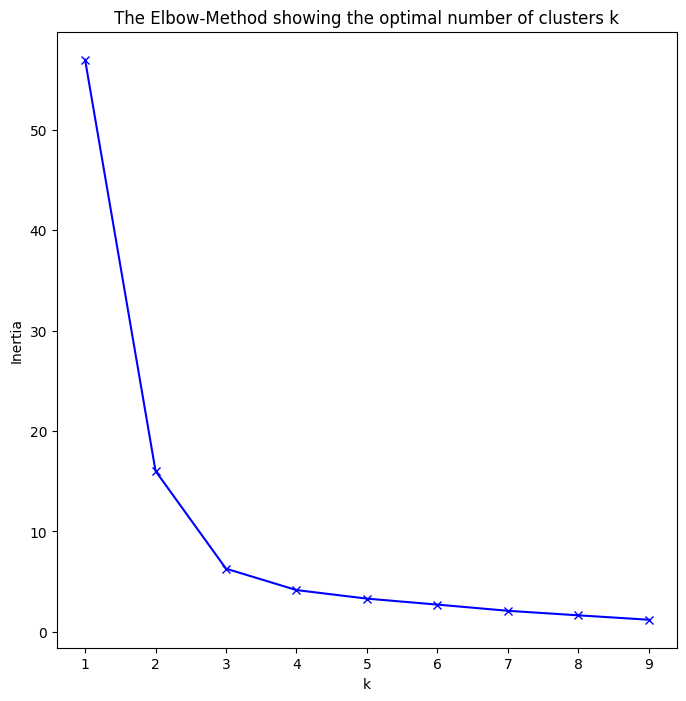

In [24]:
import matplotlib.pylab as plt
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow-Method showing the optimal number of clusters k')
plt.show()

The Optimal number of Cluster is 3!

(in Add On Chapter you can oberserve the corresponding Silhouette test which also defines the optimal number of clusters to 3)

## K-Means Clustering:

- Based on the elbow test, the number of clusters was determined to be three, indicating a significant improvement in clustering quality.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-6cd511e10e28>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rainbow = cm.get_cmap('rainbow')


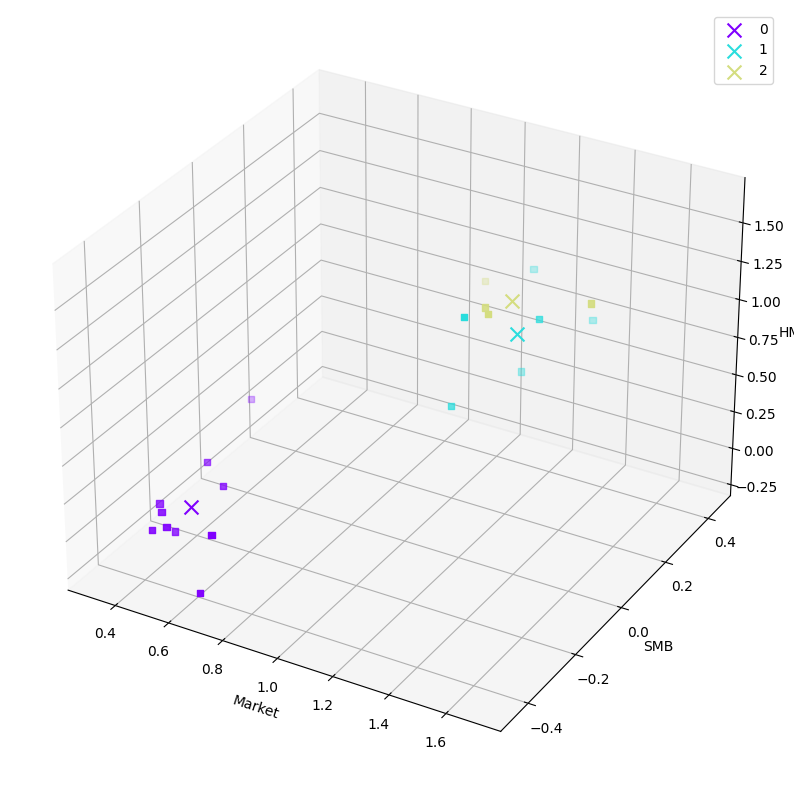

In [25]:
from matplotlib import cm

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(all_risks_clustering_scaled.values)

rainbow = cm.get_cmap('rainbow')
colors = rainbow([i / len(np.unique(kmeans.labels_)) for i in range(len(np.unique(kmeans.labels_)))])

all_risks_clustering.loc[:, 'cluster'] = kmeans.labels_

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

for i, cluster in enumerate(np.unique(kmeans.labels_)):
  mkt_tmp = all_risks_clustering[all_risks_clustering.cluster == cluster].values[:, 0]
  smb_tmp = all_risks_clustering[all_risks_clustering.cluster == cluster].values[:, 1]
  hml_tmp = all_risks_clustering[all_risks_clustering.cluster == cluster].values[:, 2]
  ax.scatter(mkt_tmp, smb_tmp, hml_tmp, color = colors[i], marker = "s")
  c_center = kmeans.cluster_centers_[cluster]
  c_center_non_scaled = c_center[:3] * all_risks_clustering_s + all_risks_clustering_m
  ax.scatter(c_center_non_scaled[0], c_center_non_scaled[1], c_center_non_scaled[2], color = colors[i], marker = 'x', s = 100, label = cluster)


ax.set_xlabel('Market')
ax.set_ylabel('SMB')
ax.set_zlabel('HML')
ax.legend()

plt.show()

## Results:

The following part shows the distribution of the companys to the clusters. We can observe that all low risk companys are in cluster 0 and all high risk campanys are in cluster 1 / 2.
- **Therby this confirms the hypothesis made at the beginning of the task!!**
- (When we consider two overall clusters then the cluster 1 and 2 are combined)

In [26]:
cluster_interpretation.loc[:, 'cluster'] = kmeans.labels_
cluster_interpretation

,Mkt-RF,SMB,HML,cluster
CLX,0.44044,-0.323629,-0.089833,0
KR,0.528921,-0.22285,0.117507,0
CPB,0.432839,-0.398484,0.027928,0
GIS,0.374924,-0.3132,0.046765,0
NEM,0.320691,0.104618,0.130264,0
K,0.428205,-0.35793,0.086049,0
WMT,0.655175,-0.447524,-0.190705,0
CAG,0.414259,-0.168836,0.13553,0
KMB,0.482099,-0.39364,0.068656,0
VZ,0.647604,-0.390845,0.106578,0


In [27]:
cluster_interpretation.loc[low_risk]

,Mkt-RF,SMB,HML,cluster
CLX,0.44044,-0.323629,-0.089833,0
KR,0.528921,-0.22285,0.117507,0
CPB,0.432839,-0.398484,0.027928,0
GIS,0.374924,-0.3132,0.046765,0
NEM,0.320691,0.104618,0.130264,0
K,0.428205,-0.35793,0.086049,0
WMT,0.655175,-0.447524,-0.190705,0
CAG,0.414259,-0.168836,0.13553,0
KMB,0.482099,-0.39364,0.068656,0
VZ,0.647604,-0.390845,0.106578,0


In [28]:
cluster_interpretation.loc[high_risk]

,Mkt-RF,SMB,HML,cluster
LNC,1.6896,-0.045059,1.655233,2
APA,1.098436,0.435458,0.959756,1
HAL,1.225203,0.309231,0.85286,1
OXY,1.055831,0.183567,0.949092,1
FCX,1.313842,0.442363,0.712262,1
KEY,1.409329,-0.144137,1.622506,2
FITB,1.444387,-0.174621,1.639637,2
BA,1.047655,0.140573,0.413032,1
BBWI,1.163976,0.308406,0.473245,1
CMA,1.253564,0.038724,1.472926,2


In [29]:
low_risk_interpretation = cluster_interpretation.loc[low_risk]
low_risk_interpretation.mean()

Mkt-RF     0.472516
SMB       -0.291232
HML        0.043874
cluster    0.000000
dtype: float64

In [30]:
high_risk_interpretation = cluster_interpretation.loc[high_risk]
high_risk_interpretation.mean()

Mkt-RF     1.270182
SMB        0.149450
HML        1.075055
cluster    1.400000
dtype: float64

## Interpretation and Evaluation:



The cluster analysis employed K-means clustering to segment the dataset based on the characteristics of the FF betas, where the number of clusters was determined as three using the elbow test. The resulting data frames and clustering chart demonstrate a distinct distribution pattern, with a high degree of correspondence between low-risk companys which were all assigned to cluster 0 and high-risk companys assigned to cluster 1 and 2, indicating a strong association between risk level and cluster membership. This leads to the conclusion that the FF-Betas have different value domains for different risk contributors/levels.  

**Comparison:**
If we just look at the values of the FF-Beta factors we can see similarites in the respective groups for high/low risk. These differences were also catched by the cluster analysis.

**High Risk:**

- MKT-RF: Values above one refer to a movement with the market which is sensitive to market fluctuations.

- SMB: mostly small positive values with indicates that the companies were refferred to small makret-cap. companies rather then large. (for 3 of the comapnies negative value => big market-cap company)

- HML: Positive for all of the companies witch indicated that the comapnies where seen as value stocks rather then growth (high book to market value)


**Low Risk:**

- MKT-RF: small positive values indicates less movements with the market

- SMB: except for one all values were negative which indicated that the companies were seen as big market-cap companies.

- HML: slighly positive for 8 out of 10 companies, which is referred to value stocks (explained above) and 2 were seen as growth stocks with a negative value.


**Comparing the means of the high risk and low risk companys (FFF):**

High-Risk:
- Mkt-RF: 1.270182
- SMB:        0.149450
- HML:        1.075055

Low-Risk
- Mkt-RF:     0.472516
- SMB:        -0.291232
- HML:        0.043874

Clear differences between the FF-Factor exposure of high/low risk companys:

- High and low risk move with the market wheras high risk has a greater value, referring to a more sensitve reaction to the market.

- High embodys small market-cap companys wheras low-risk embodys big market-cap companys.

- High risk embodys value stocks and low risk also embodys value stocks but with a lower HML value. This means that High Risk Comapnys are more represented by value stocks then low risk companys.

# Add On:



Silhoutte:

"Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Therefore I prefer the highest Silhoutte Score!
= Silhoutte Score is for 3 clusters maximized

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score
#define a function which plots silhouette scores for a given k-means clustering model
def plot_silhouettes(data, k_means):
    X = data
    labels = k_means.labels_

    n_clusters = len(np.unique(labels))

    fig, ax = plt.subplots(1, 1, figsize = (8, 6))

    x_split = 10

    ax.set_xlim([0, len(X) + (n_clusters + 1) * x_split])
    ax.set_ylim([np.min(silhouette_samples(X, labels)) - 0.1, 1])

    x_lower = x_split

    sample_silhouette_scores = silhouette_samples(X, labels)

    for i in range(n_clusters):

        ith_cluster_silhouette_scores = sample_silhouette_scores[labels == i]
        ith_cluster_silhouette_scores.sort()

        ith_size = ith_cluster_silhouette_scores.shape[0]

        x_upper = x_lower + ith_size

        ax.fill_between(np.arange(x_lower, x_upper), 0,
                        ith_cluster_silhouette_scores)

        x_lower = x_upper + x_split

    ax.set_xlabel('Observations')
    ax.set_ylabel('Silhouette score')
    ax.set_title(f'Avg. Silhouette score: {silhouette_score(X, labels):.2f}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


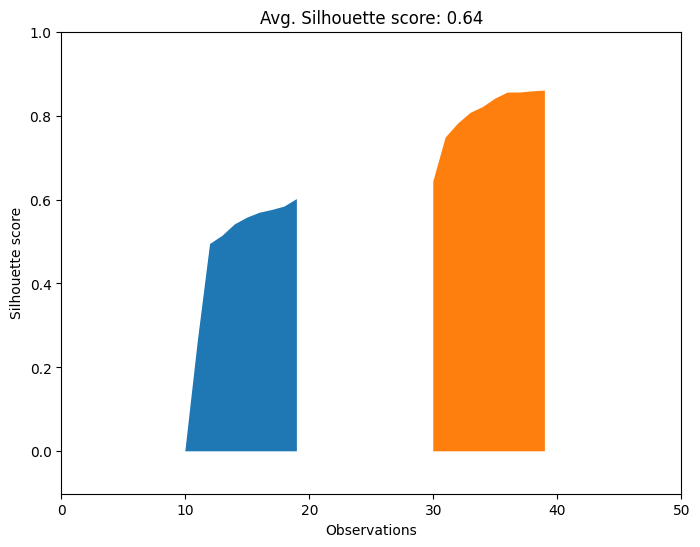

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


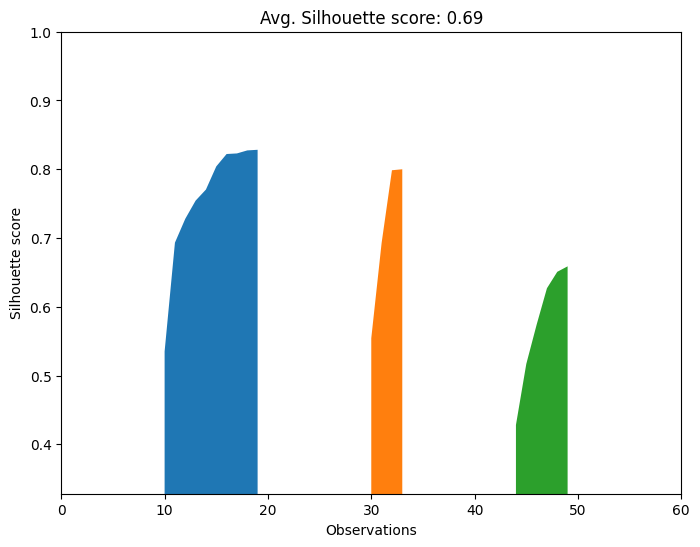

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


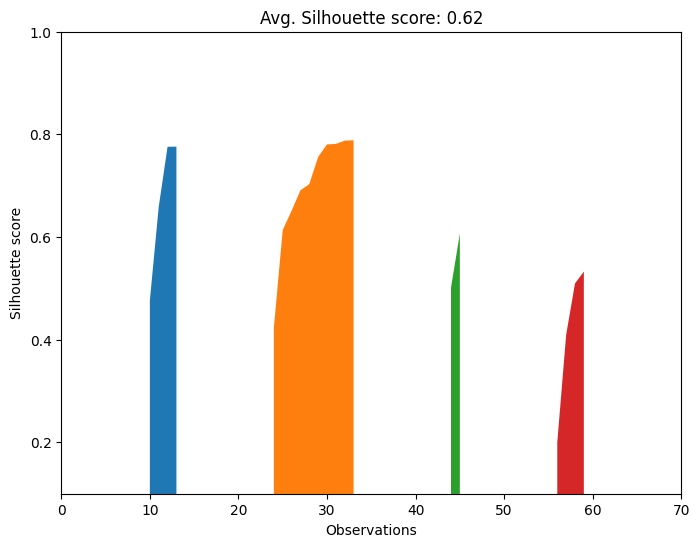

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


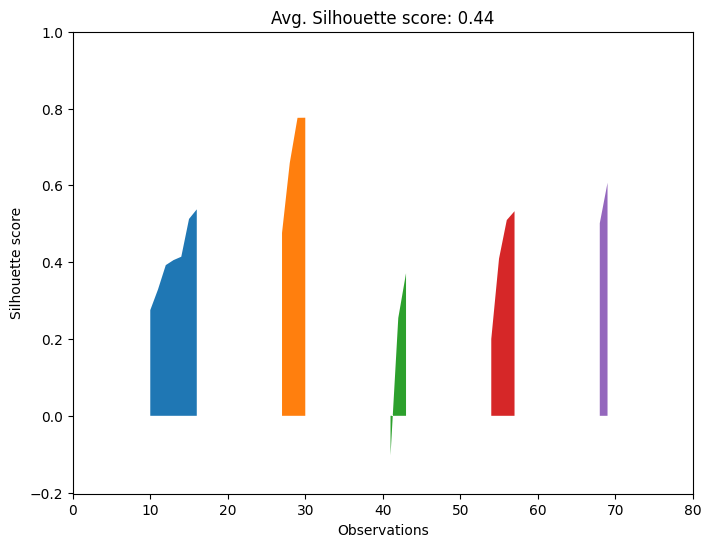

In [32]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 42).fit(all_risks_clustering[['Mkt-RF',	'SMB',	'HML']].values)
plot_silhouettes(all_risks_clustering[['Mkt-RF',	'SMB',	'HML']].values, kmeans)

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(all_risks_clustering[['Mkt-RF',	'SMB',	'HML']].values)
plot_silhouettes(all_risks_clustering[['Mkt-RF',	'SMB',	'HML']].values, kmeans)

kmeans = KMeans(n_clusters = 4, random_state = 42).fit(all_risks_clustering[['Mkt-RF',	'SMB',	'HML']].values)
plot_silhouettes(all_risks_clustering[['Mkt-RF',	'SMB',	'HML']].values, kmeans)

kmeans = KMeans(n_clusters = 5, random_state = 42).fit(all_risks_clustering[['Mkt-RF',	'SMB',	'HML']].values)
plot_silhouettes(all_risks_clustering[['Mkt-RF',	'SMB',	'HML']].values, kmeans)